In [5]:
import pandas as pd

# Load the data
file_path = r'C:\Users\laptop\Desktop\exported_students_data.csv'
data = pd.read_csv(file_path)

# Aggregate data by Academic Performance and calculate means
comparative_analysis = data.groupby('Academic Performance').agg({
    'Attendance Percentage': 'mean',
    'Daily Study Hours': 'mean',
    'Daily Gaming Hours': 'mean'
}).reset_index()

# Display the results
print(comparative_analysis)


  Academic Performance  Attendance Percentage  Daily Study Hours  \
0              Average              86.943714           3.974090   
1                 Good              90.115658           4.021865   
2    Needs Improvement              81.121417           3.972441   

   Daily Gaming Hours  
0            0.620906  
1            0.592398  
2            0.739370  


In [6]:
import pandas as pd

# Load the data
file_path = r'C:\Users\laptop\Desktop\exported_students_data.csv'
data = pd.read_csv(file_path)

# Define the variables for comparison
variables = ['Academic Stress', 'Motivation', 'Sleep Disorder',
             'Depression', 'Has Electronic Device', 
             'Has Social Media Accounts', 'Social Media Impact On Studies']

# Initialize a DataFrame to store the results
comparative_analysis_2 = pd.DataFrame()

# Loop over each variable and compute crosstab percentages
for var in variables:
    result = pd.crosstab(data[var], data['Academic Performance'], normalize='columns') * 100
    comparative_analysis_2 = pd.concat([comparative_analysis_2, result], axis=0)

# Display the results
print(comparative_analysis_2.round(2))


Academic Performance  Average   Good  Needs Improvement
High                    33.42  33.31              35.43
Low                     34.00  33.07              33.07
Moderate                32.58  33.62              31.50
High                    34.97  34.48              29.92
Low                     32.86  32.05              30.71
Moderate                32.17  33.46              39.37
High                    24.52  26.88              18.90
Low                     24.99  22.18              22.83
Moderate                25.69  25.16              27.56
Not Specified           24.80  25.78              30.71
False                   51.29  51.88              42.52
True                    48.71  48.12              57.48
False                   50.35  53.37              54.33
True                    49.65  46.63              45.67
False                   87.27  89.58              85.83
True                    12.73  10.42              14.17
Negative                 3.25   2.66            

Model Accuracy: 0.71


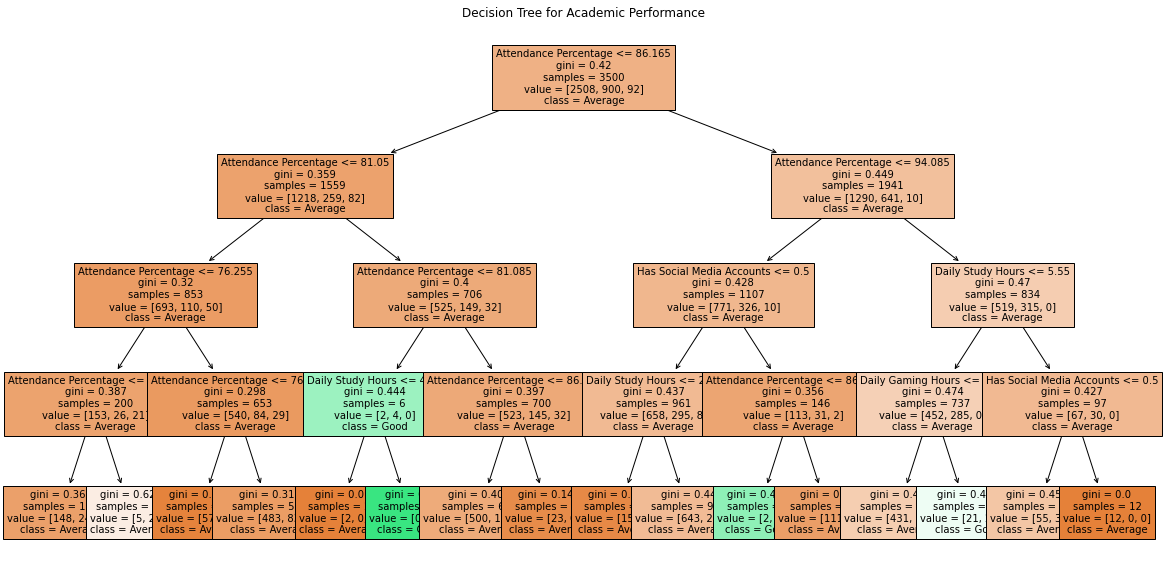

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\laptop\Desktop\exported_students_data.csv'
data = pd.read_csv(file_path)

# Define key features
features = [
    'Attendance Percentage', 'Daily Study Hours', 'Daily Gaming Hours',
    'Academic Stress', 'Motivation', 'Sleep Disorder',
    'Depression', 'Has Electronic Device', 'Has Social Media Accounts'
]

# Encode categorical variables
data_encoded = data.copy()
label_encoders = {}
for col in ['Academic Stress', 'Motivation', 'Sleep Disorder', 'Depression',
            'Has Electronic Device', 'Has Social Media Accounts']:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = data_encoded[features]
y = data_encoded['Academic Performance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the decision tree model
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model accuracy
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=clf.classes_, filled=True, fontsize=10)
plt.title("Decision Tree for Academic Performance")
plt.show()
